In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500,1.074000


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,28.364668,27.512667,27.890667,28.350000,120820500,28.350000
2019-12-26,28.898666,28.423332,28.527332,28.729334,159508500,28.729334
2019-12-27,29.020666,28.407333,29.000000,28.691999,149185500,28.691999
2019-12-30,28.600000,27.284000,28.586000,27.646667,188796000,27.646667
2019-12-31,28.086000,26.805332,27.000000,27.888666,154285500,27.888666


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500,1.592667
1,2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500,1.588667
2,2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000,1.464000
3,2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000,1.280000
4,2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500,1.074000


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,1.666667,1.169333,1.266667,1.592667,281494500
1,2.028000,1.553333,1.719333,1.588667,257806500
2,1.728000,1.351333,1.666667,1.464000,123282000
3,1.540000,1.247333,1.533333,1.280000,77097000
4,1.333333,1.055333,1.333333,1.074000,103003500


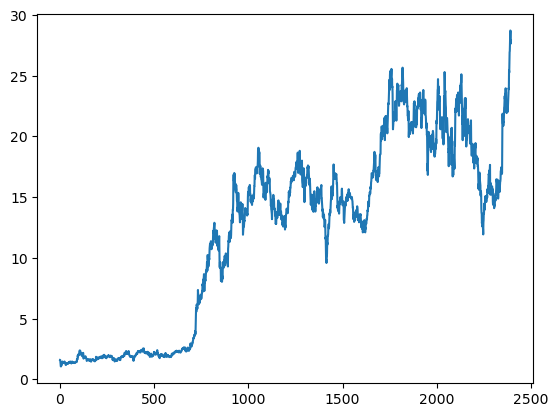

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,1.666667,1.169333,1.266667,1.592667,281494500
1,2.028000,1.553333,1.719333,1.588667,257806500
2,1.728000,1.351333,1.666667,1.464000,123282000
3,1.540000,1.247333,1.533333,1.280000,77097000
4,1.333333,1.055333,1.333333,1.074000,103003500
...,...,...,...,...,...
2389,28.364668,27.512667,27.890667,28.350000,120820500
2390,28.898666,28.423332,28.527332,28.729334,159508500
2391,29.020666,28.407333,29.000000,28.691999,149185500
2392,28.600000,27.284000,28.586000,27.646667,188796000


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2389    18.905800
2390    19.040880
2391    19.173967
2392    19.294820
2393    19.414840
Name: Close, Length: 2394, dtype: float64

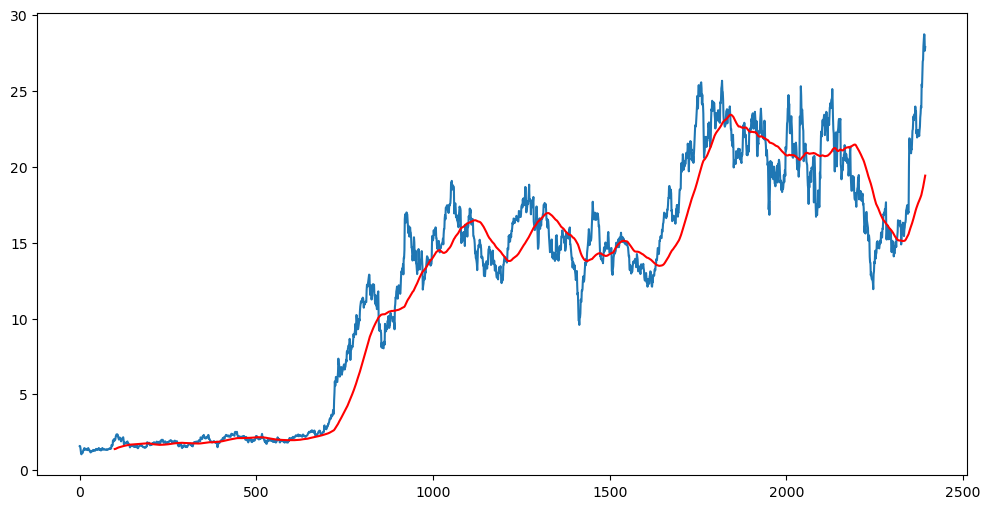

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2389    17.477367
2390    17.524693
2391    17.571500
2392    17.617923
2393    17.667537
Name: Close, Length: 2394, dtype: float64

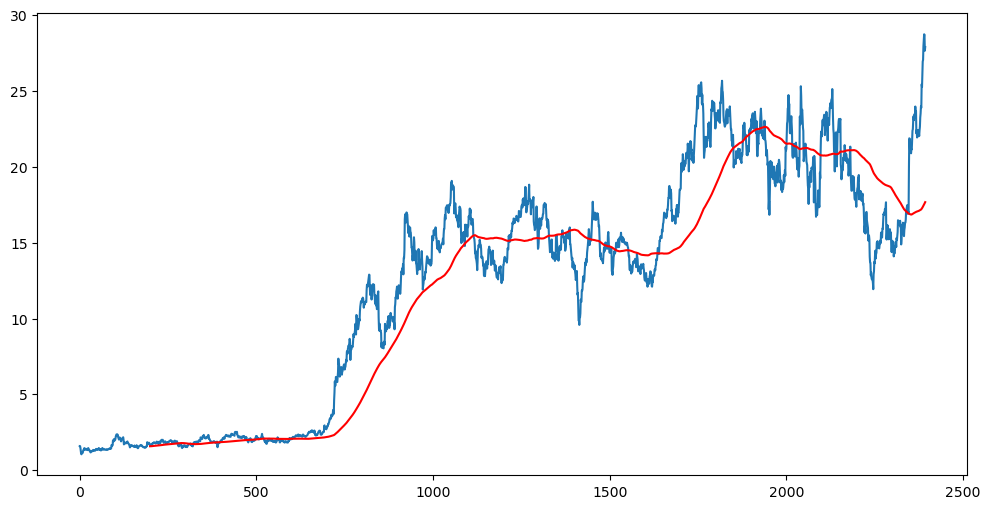

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'r')

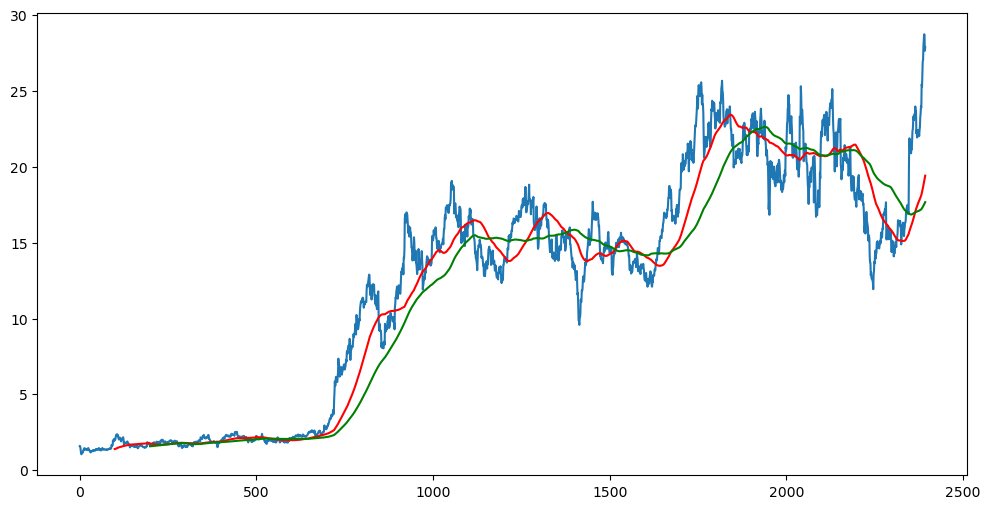

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2394, 5)

In [14]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1675, 1)
(719, 1)


In [15]:
data_training.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [16]:
data_testing.head()

,Close
1675,17.066000
1676,17.133333
1677,16.415333
1678,16.666000
1679,16.667999


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02993639],
       [0.02971437],
       [0.02279457],
       ...,
       [0.94889733],
       [0.96799146],
       [0.95363383]])

In [18]:
data_training_array.shape

(1675, 1)

In [19]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [20]:
x_train.shape

(1575, 100, 1)

In [21]:
# ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))

model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
50/50 [==============================] - 31s 361ms/step - loss: 0.0684
Epoch 2/50
50/50 [==============================] - 13s 268ms/step - loss: 0.0117
Epoch 3/50
50/50 [==============================] - 7s 141ms/step - loss: 0.0095
Epoch 4/50
50/50 [==============================] - 7s 140ms/step - loss: 0.0103
Epoch 5/50
50/50 [==============================] - 7s 135ms/step - loss: 0.0105
Epoch 6/50
50/50 [==============================] - 8s 158ms/step - loss: 0.0091
Epoch 7/50
50/50 [==============================] - 11s 221ms/step - loss: 0.0090
Epoch 8/50
50/50 [==============================] - 10s 191ms/step - loss: 0.0080
Epoch 9/50
50/50 [==============================] - 9s 180ms/step - loss: 0.0080
Epoch 10/50
50/50 [==============================] - 9s 176ms/step - loss: 0.0079
Epoch 11/50
50/50 [==============================] - 10s 201ms/step - loss: 0.0079
Epoch 12/50
50/50 [==============================] - 10s 194ms/step - loss: 0.0075
Epoch 13/50
50/50 [

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1675,17.066000
1676,17.133333
1677,16.415333
1678,16.666000
1679,16.667999


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\Agriya\AppData\Local\Temp\ipykernel_27212\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [30]:
final_df.head()

,Close
0,13.380000
1,13.602000
2,14.246667
3,14.094000
4,13.897333


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08624047],
       [0.09945634],
       [0.13783392],
       [0.12874551],
       [0.11703777],
       [0.08743106],
       [0.07000836],
       [0.08723264],
       [0.08385924],
       [0.08945513],
       [0.08441482],
       [0.06961152],
       [0.05949126],
       [0.07989046],
       [0.09759106],
       [0.07989046],
       [0.0838195 ],
       [0.09441602],
       [0.09274916],
       [0.09235232],
       [0.09937697],
       [0.08334328],
       [0.07445336],
       [0.04691035],
       [0.03591704],
       [0.0335358 ],
       [0.04599761],
       [0.05651471],
       [0.06338062],
       [0.04401322],
       [0.02532051],
       [0.03806016],
       [0.00984252],
       [0.01904992],
       [0.01968493],
       [0.03845701],
       [0.02401087],
       [0.02202648],
       [0.04841853],
       [0.05623692],
       [0.0701671 ],
       [0.06806372],
       [0.04206851],
       [0.04139388],
       [0.01154901],
       [0.00992183],
       [0.03107514],
       [0.027

In [32]:
input_data.shape

(819, 1)

In [33]:
x_test = []
y_test = []

prediction_days = 100

for i in range(prediction_days, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(719, 100, 1)
(719,)


In [35]:
# Making Predictions

In [36]:
y_predicted = model.predict(x_test)

23/23 [==============================] - 2s 38ms/step


In [37]:
y_predicted.shape

(719, 1)

In [38]:
y_test

array([0.30567133, 0.30967974, 0.26693653, 0.281859  , 0.28197799,
       0.2838037 , 0.28812958, 0.28670083, 0.27630273, 0.26947656,
       0.26165822, 0.25685602, 0.26669843, 0.31364852, 0.30463954,
       0.32972177, 0.32753896, 0.32920582, 0.28459739, 0.30178203,
       0.30086912, 0.33412713, 0.36214635, 0.39084026, 0.39056242,
       0.39270549, 0.39421361, 0.47446122, 0.49501933, 0.46049141,
       0.47517566, 0.49041548, 0.5295075 , 0.51490262, 0.46779379,
       0.49620986, 0.48604997, 0.48132713, 0.50224234, 0.49029649,
       0.50255981, 0.51220386, 0.53506365, 0.52069688, 0.51458503,
       0.53617493, 0.57094095, 0.55530416, 0.52407034, 0.46231689,
       0.51347387, 0.50887014, 0.5647101 , 0.58042625, 0.5720126 ,
       0.57879902, 0.54335831, 0.54784305, 0.50458389, 0.53216652,
       0.52331628, 0.52141132, 0.49565428, 0.52089536, 0.54712861,
       0.58010878, 0.61963726, 0.64309238, 0.64055247, 0.63848877,
       0.6681351 , 0.6900821 , 0.71706953, 0.75814587, 0.70782

In [39]:
y_predicted

array([[0.36240804],
       [0.36647564],
       [0.37010434],
       [0.37319148],
       [0.37571353],
       [0.3776989 ],
       [0.37920982],
       [0.38031757],
       [0.38109386],
       [0.38160035],
       [0.3818894 ],
       [0.3820044 ],
       [0.38198107],
       [0.3818497 ],
       [0.38164097],
       [0.38138187],
       [0.3810991 ],
       [0.38081425],
       [0.38054705],
       [0.38030255],
       [0.3800815 ],
       [0.37988275],
       [0.37971318],
       [0.3795875 ],
       [0.37956068],
       [0.3797047 ],
       [0.3801273 ],
       [0.38092807],
       [0.38239193],
       [0.38502818],
       [0.38912597],
       [0.39476883],
       [0.40182087],
       [0.4103776 ],
       [0.4201613 ],
       [0.4300571 ],
       [0.43935657],
       [0.44754004],
       [0.45430684],
       [0.45975178],
       [0.4640059 ],
       [0.46730596],
       [0.46996176],
       [0.47244573],
       [0.47497028],
       [0.4775166 ],
       [0.48020804],
       [0.483

In [40]:
scaler.scale_

array([0.05953089])

In [41]:
scale_factor = 1/0.05953089
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

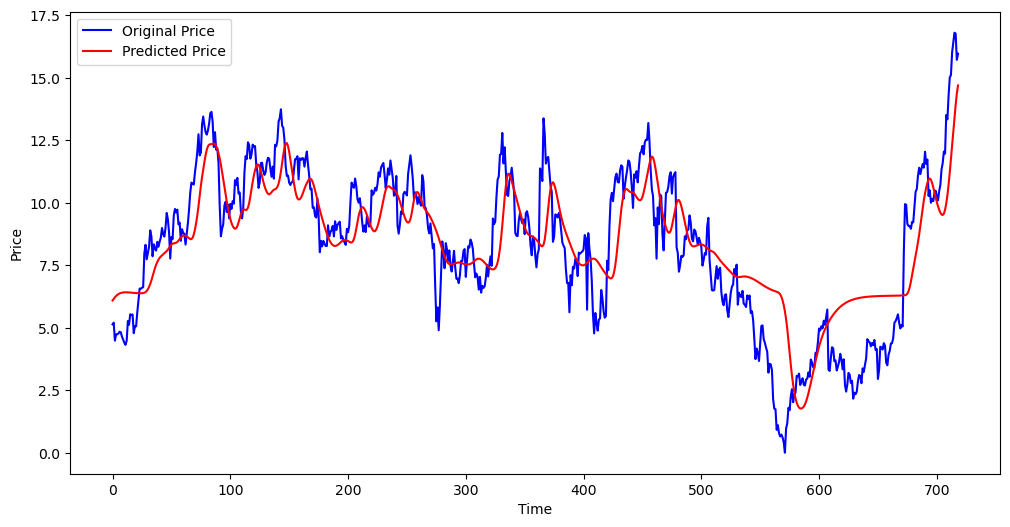

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()